# IMPLEMENTATION OF A THREE HIDDEN LAYER NEURAL NETWORK FOR MULTI-CLASS CLASSIFICATION

### **AMERICAN INTERNATIONAL UNIVERSITY-BANGLADESH (AIUB)**  
**Name:** AZMINUR RAHMAN  
**ID:** 22-46588-1  
**Course:** COMPUTER VISION AND PATTERN RECOGNITION  
**Section:** A  
**Course Teacher:** DR. DEBAJYOTI KARMAKER  

---

**Assignment 2**

# Import all libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# generate data

In [18]:
def generate_data(samples_per_class=2000):
    np.random.seed(32)
    class1 = np.random.randn(samples_per_class, 2) + [3, 4]
    class2 = np.random.randn(samples_per_class, 2) + [2, 10]
    class3 = np.random.randn(samples_per_class, 2) + [8, 8]
    class4 = np.random.randn(samples_per_class, 2) + [13, 6]
    class5 = np.random.randn(samples_per_class, 2) + [13, 13]
    X = np.vstack((class1, class2, class3, class4, class5))
    y = np.array([0]*samples_per_class + [1]*samples_per_class + [2]*samples_per_class + [3]*samples_per_class + [4]*samples_per_class)
    return X, y

X, y = generate_data()

# save data

In [19]:
import pandas as pd

df = pd.DataFrame(data=X, columns=['feature1', 'feature2'])
df['label'] = y

df.to_csv('generated_data.csv', index=False)

# Visualizing the data

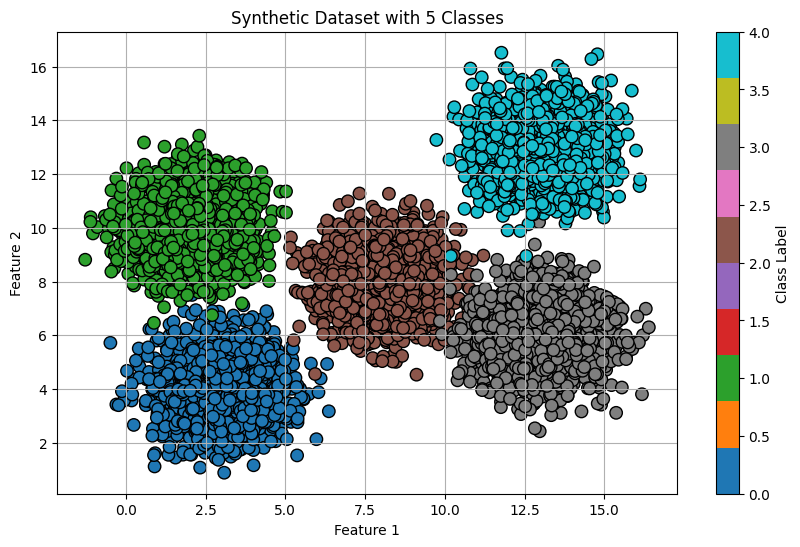

In [20]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', edgecolor='k', s=80)
plt.title("Synthetic Dataset with 5 Classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(scatter, label="Class Label")
plt.grid(True)
plt.show()

In [21]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

In [22]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.4, random_state=32)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=32)

In [23]:
print(f"Train data: {X_train.shape[0]} samples")
print(f"Validation data: {X_val.shape[0]} samples")
print(f"Test data: {X_test.shape[0]} samples")

Train data: 6000 samples
Validation data: 2000 samples
Test data: 2000 samples


# Define the NN

In [24]:
class NeuralNetwork:
    def __init__(self, input_size, h1, h2, h3, output_size, lr):
        self.W1 = np.random.randn(input_size, h1)
        self.W2 = np.random.randn(h1, h2)
        self.W3 = np.random.randn(h2, h3)
        self.W4 = np.random.randn(h3, output_size)
        self.lr = lr

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feed_forward(self, x):
        self.z1 = np.dot(x, self.W1)
        self.a1 = self.sigmoid(self.z1)

        self.z2 = np.dot(self.a1, self.W2)
        self.a2 = self.sigmoid(self.z2)

        self.z3 = np.dot(self.a2, self.W3)
        self.a3 = self.sigmoid(self.z3)

        self.z4 = np.dot(self.a3, self.W4)
        self.output = self.sigmoid(self.z4)
        return self.output

    def backprop(self, x, y, output):
        output_error = y - output
        output_delta = output_error * self.sigmoid(output, derivative=True)

        error3 = np.dot(output_delta, self.W4.T)
        delta3 = error3 * self.sigmoid(self.a3, derivative=True)

        error2 = np.dot(delta3, self.W3.T)
        delta2 = error2 * self.sigmoid(self.a2, derivative=True)

        error1 = np.dot(delta2, self.W2.T)
        delta1 = error1 * self.sigmoid(self.a1, derivative=True)

        self.W4 += np.dot(self.a3.T, output_delta) * self.lr
        self.W3 += np.dot(self.a2.T, delta3) * self.lr
        self.W2 += np.dot(self.a1.T, delta2) * self.lr
        self.W1 += np.dot(x.T, delta1) * self.lr

    def train(self, x, y):
        output = self.feed_forward(x)
        self.backprop(x, y, output)

# Train the Neural Network

In [25]:
epochs = 800

NN = NeuralNetwork(X_train.shape[1], 32, 16, 8, y_train.shape[1], 0.0001)
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(epochs):
    NN.train(X_train, y_train)
    train_output = NN.feed_forward(X_train)
    val_output = NN.feed_forward(X_val)

    train_loss = np.mean((y_train - train_output) ** 2)
    val_loss = np.mean((y_val - val_output) ** 2)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    train_accuracy = accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_output, axis=1))
    val_accuracy = accuracy_score(np.argmax(y_val, axis=1), np.argmax(val_output, axis=1))
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}, "
              f"Train Accuracy = {train_accuracy * 100:.2f}%, Validation Accuracy = {val_accuracy * 100:.2f}%")

Epoch 0: Train Loss = 0.3991, Validation Loss = 0.4004, Train Accuracy = 20.80%, Validation Accuracy = 20.75%
Epoch 50: Train Loss = 0.1379, Validation Loss = 0.1380, Train Accuracy = 53.03%, Validation Accuracy = 53.45%
Epoch 100: Train Loss = 0.1185, Validation Loss = 0.1187, Train Accuracy = 58.22%, Validation Accuracy = 59.20%
Epoch 150: Train Loss = 0.1056, Validation Loss = 0.1059, Train Accuracy = 57.83%, Validation Accuracy = 59.10%
Epoch 200: Train Loss = 0.0964, Validation Loss = 0.0968, Train Accuracy = 72.27%, Validation Accuracy = 72.30%
Epoch 250: Train Loss = 0.0902, Validation Loss = 0.0907, Train Accuracy = 66.52%, Validation Accuracy = 66.60%
Epoch 300: Train Loss = 0.0852, Validation Loss = 0.0859, Train Accuracy = 68.07%, Validation Accuracy = 66.85%
Epoch 350: Train Loss = 0.0808, Validation Loss = 0.0817, Train Accuracy = 73.37%, Validation Accuracy = 71.45%
Epoch 400: Train Loss = 0.0766, Validation Loss = 0.0777, Train Accuracy = 78.78%, Validation Accuracy = 76

# Visualize Accuracy and Loss

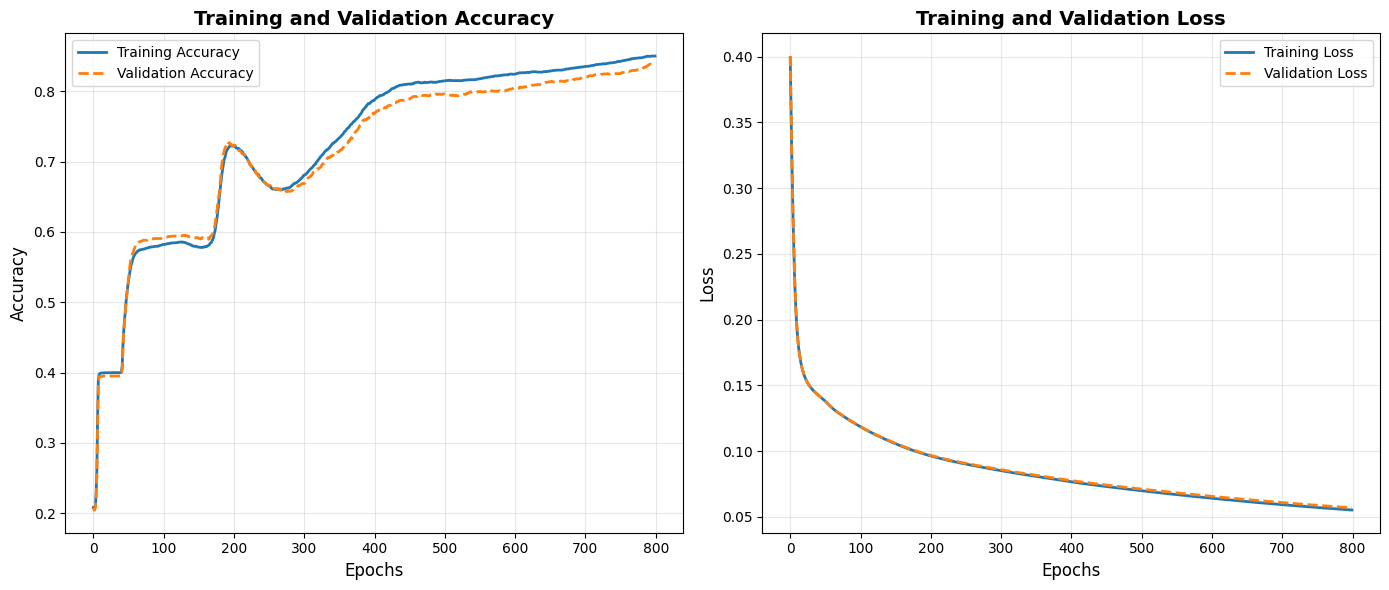

In [26]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label="Training Accuracy", linestyle='-', linewidth=2)
plt.plot(val_accuracies, label="Validation Accuracy", linestyle='--', linewidth=2)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training and Validation Accuracy", fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(train_losses, label="Training Loss", linestyle='-', linewidth=2)
plt.plot(val_losses, label="Validation Loss", linestyle='--', linewidth=2)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Loss", fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       393
           1       0.94      1.00      0.97       406
           2       0.97      0.37      0.54       381
           3       0.96      1.00      0.98       405
           4       0.71      0.99      0.83       415

    accuracy                           0.86      2000
   macro avg       0.88      0.85      0.84      2000
weighted avg       0.88      0.86      0.84      2000



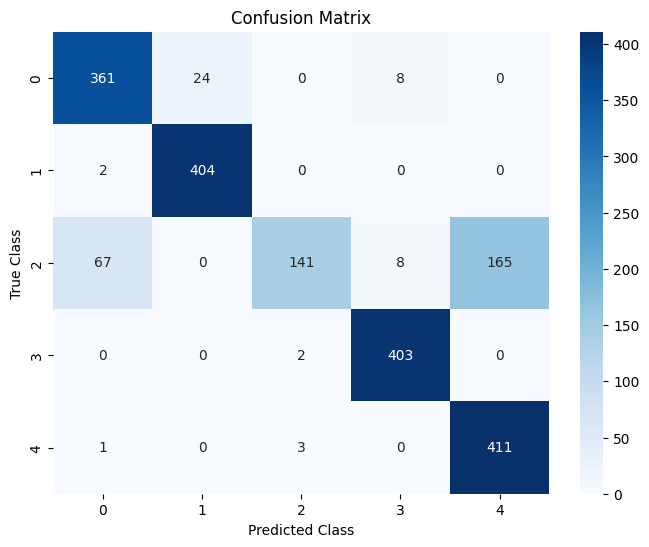

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict on test data
test_output = NN.feed_forward(X_test)
test_preds = np.argmax(test_output, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(true_labels, test_preds))

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, test_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(5), yticklabels=range(5))
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

# ROC curves

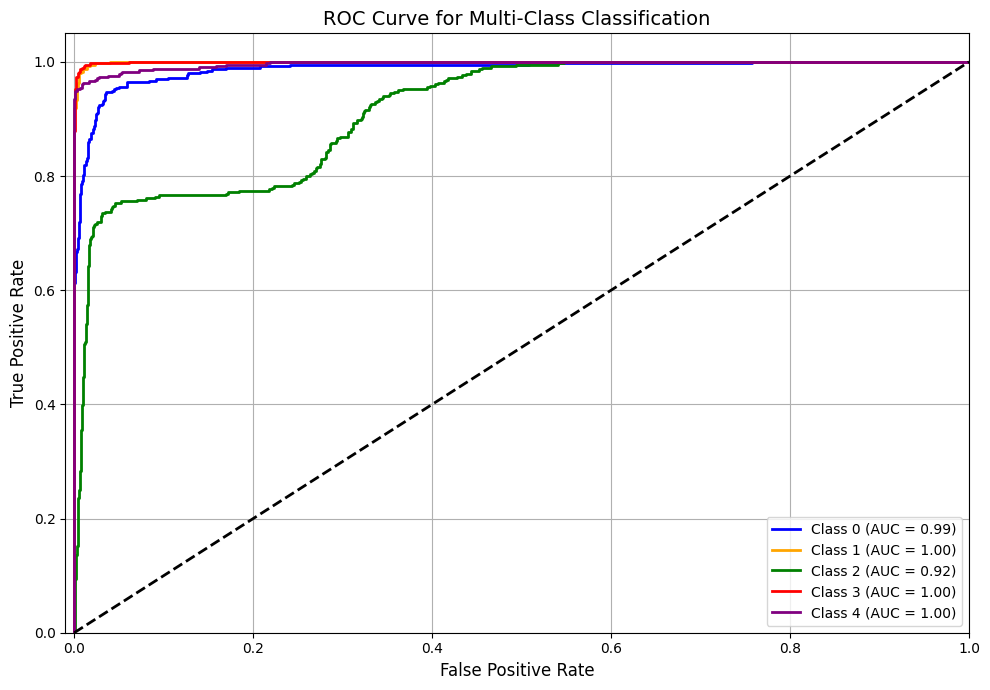

In [30]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

true_labels = np.argmax(y_test, axis=1)
predicted_probs = NN.feed_forward(X_test)

n_classes = predicted_probs.shape[1]
y_test_bin = label_binarize(true_labels, classes=range(n_classes))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], predicted_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 7))
colors = ['blue', 'orange', 'green', 'red', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve for Multi-Class Classification', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()